In [1]:
!pwd
!date
!ls

/home/sphere/github/Sphere/Data2013/currents
Чт апр 26 13:27:53 MSK 2018
1currents.txt  4currents.txt	    currents_2013.txt
2currents.txt  5currents.txt	    Currents_Hamamatsu_2013.ipynb
3currents.txt  Currents_2013.ipynb  High_ham.dat


In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mp
from tqdm import tqdm
import math as mt
import numpy as np

from matplotlib import dates
import datetime as dt

In [3]:
plt.rcParams['figure.figsize'] =(8,4)
plt.rcParams['lines.markersize'] = 3.5
plt.rcParams['lines.markeredgewidth'] = 1
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['grid.alpha'] = 0.7
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['font.size'] = 14

In [111]:
datum = []
for i in range(1, 6):
    filename = str(i) + 'currents.txt'
    data = pd.read_csv(filename, header = 0, index_col=0, sep='\t')
    data['run'] = i
    datum.append(data)
datum = pd.concat(datum)
print(len(datum))
print(datum.shape)
#datum.run.value_counts()

3801
(3801, 115)


In [112]:
datum.head(2)

,H,time,cur1,cur2,cur3,cur4,cur5,cur6,cur7,cur8,...,cur104,cur105,cur106,cur107,cur108,cur109,cur110,cur111,cur112,run
N,,,,,,,,,,,,,,,,,,,,,
10675,307.8,13:13:07,3.0,7.1,4.1,3.5,7.5,5.3,6.5,8.3,...,3.0,13.9,4.2,2.3,8.2,2.8,0.0,0.0,0.0,1
10676,307.8,13:13:07,3.0,7.1,4.1,3.5,7.5,5.3,6.5,8.3,...,3.0,13.9,4.2,2.3,8.2,2.8,0.0,0.0,0.0,1


In [113]:
params = ['time','cur1','run']
datum = datum[params]
datum['curn'] = datum['cur1'] * 1.24
datum.head(2)

,time,cur1,run,curn
N,,,,
10675,13:13:07,3.0,1,3.72
10676,13:13:07,3.0,1,3.72


In [114]:
def plot_cur(pmt):
    fmt = dates.DateFormatter('%H:%M')
    plcol = ['m+-','bx--', 'gs:', 'rd-.', 'co-']
#    high = [65,(69,92),64,91,82]

    cur = 'cur' + str(pmt)

    plt.rcParams['figure.figsize'] = (12,4)
    fig, ax = plt.subplots()
    for i in range(1, 6):
        data = datum[datum.run == i]
        x = [dt.datetime.strptime(i, "%H:%M:%S") for i in data.time]
        y = data[cur]
        label = 'r' + str(i) + ', U = ' + str(high[i-1])
        ax.plot(x, y, plcol[i-1], label = label)

    ax.xaxis.set_major_formatter(fmt)
    ax.set_title('PMT' + str(pmt))
    #fig.autofmt_xdate()
    plt.legend(borderaxespad=0.1)
    plt.grid()

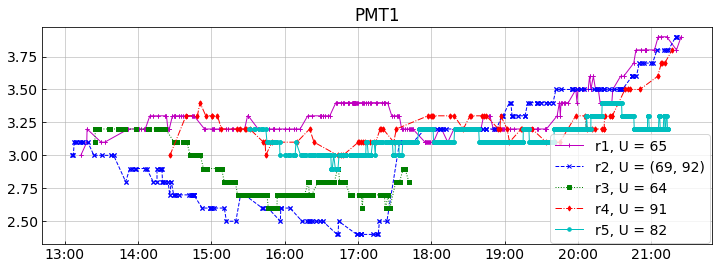

In [115]:
high = [65,(69,92),64,91,82]
plot_cur(1)

Во втором полёте напряжение на ФЭУ0 в 17:33 было изменено с кода 69 на код 92. Приведем ток к напряжению 92, считая зависимость тока от напряжения линейной. 
Событие 11463 в 17:23 - код высокого 69, ток 2.5.
Событие 11464 в 17:33 - код высокого 92, ток 3.1
Считаем, что за 10 минут ток не изменился. И домножим токи событий до 17:33 на коэффициент 1.24, приведя их к напряжению с кодом 92.

In [116]:
datum['cur0'] = datum.apply(lambda x: x['cur1'] * 1.24 if x['run'] == 2 and int(x.name) < 11464 else x['cur1'], axis = 1)

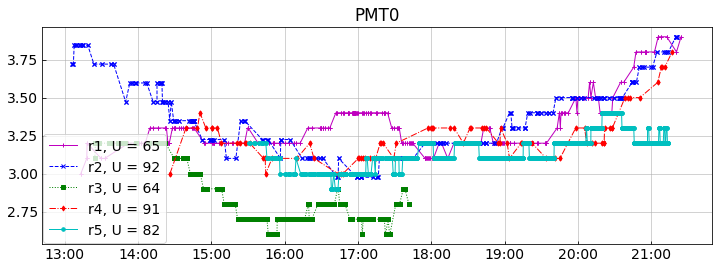

In [117]:
high = [65,92,64,91,82]
plot_cur(0)

In [119]:
datum['cur0'] = datum.apply(lambda x: x['cur0'] * 1.24 if x['run'] == 3 else x['cur0'], axis = 1)

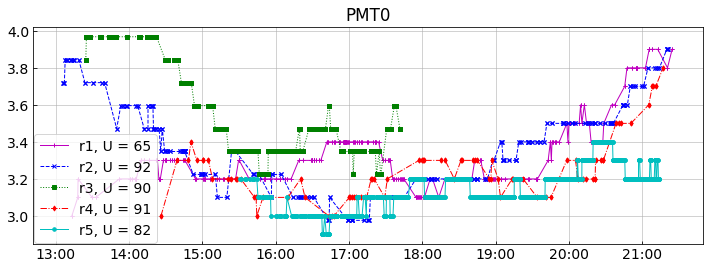

In [120]:
high = [65,92,90,91,82]
plot_cur(0)

In [121]:
datum['cur0'] = datum.apply(lambda x: x['cur0'] * 1.24 if x['run'] == 1 else x['cur0'], axis = 1)

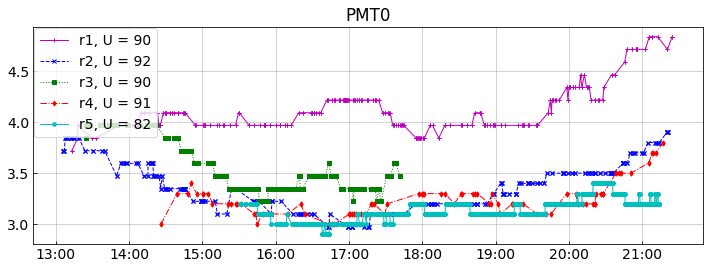

In [122]:
high = [90,92,90,91,82]
plot_cur(0)

In [123]:
datum['cur0'] = datum.apply(lambda x: x['cur0'] * 1.12 if x['run'] == 5 else x['cur0'], axis = 1)

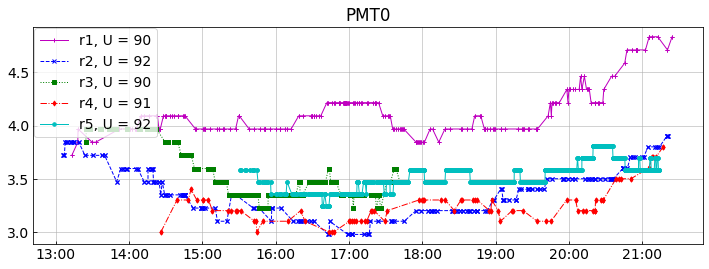

In [124]:
high = [90,92,90,91,92]
plot_cur(0)

### Коэффициент для пересчета к напряжению c кодом 92

Point2D(0, 49/25)
[[69.0 1.24]
 [92.0 1.0]
 [0 49/25]]


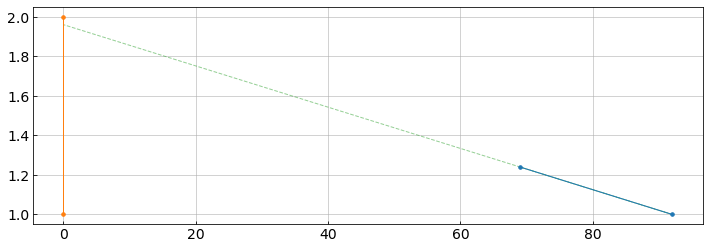

In [144]:
import matplotlib.pyplot as plt
from sympy import Line, Point, Segment
import numpy as np

x1, y1 = [69, 92], [1.24, 1]
x2, y2 = [0, 0], [2, 1]

# объекты точек
p1, p2, p3, p4 = (Point(x1[0], y1[0]), Point(x1[1], y1[1]),
                  Point(x2[0], y2[0]), Point(x2[1], y2[1]))

# объекты прямых для установления факта пересечения
# объекты отрезков для проверки наличия точки пересечения уже на отрезке
line1, seg1 = Line(p1, p2), Segment(p1, p2)
line2, seg2 = Line(p3, p4), Segment(p3, p4)

intersect = line1.intersection(line2)

l1, = plt.plot(x1, y1, marker='o', zorder=3)
l2, = plt.plot(x2, y2, marker='o', zorder=3)

if intersect:
    pi = intersect[0]
    print(pi)
    if not seg1.contains(pi):
        xydata = l1.get_xydata()
        xydata = np.vstack((xydata, [pi.x, pi.y]))
        print(xydata)
        plt.plot(xydata[:, 0], xydata[:, 1], '--', alpha=.5)
    if not seg2.contains(pi):
        xydata = l2.get_xydata()
        xydata = np.vstack((xydata, [pi.x, pi.y]))
        print(xydata)
        plt.plot(xydata[:, 0], xydata[:, 1], '--', alpha=.5)    
plt.grid()

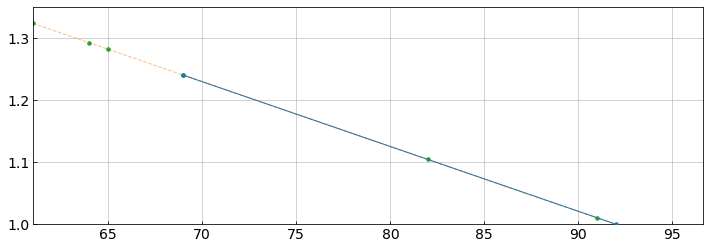

In [179]:
x = [   61,    64,    65,   69,    82,   91]
y = [1.324, 1.292, 1.282, 1.24, 1.105, 1.01]
l1, = plt.plot(x1, y1, marker='o', zorder=3)
plt.plot(xydata[:, 0], xydata[:, 1], '--', alpha=.5) 
plt.plot(x, y, 'o')
plt.xlim(61)
plt.ylim(1,1.35)
plt.grid()